In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [187]:
credito = pd.read_csv('/kaggle/input/dataset/demo01.csv')

In [188]:
credito.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [189]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [190]:
credito.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [191]:
credito.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [192]:
percentual = credito['mau'].value_counts(normalize=True) * 100
percentual

mau
False    97.657658
True      2.342342
Name: proportion, dtype: float64

In [193]:
colunas = pd.DataFrame({'colunas':credito.columns,
                       'tipo': credito.dtypes})

In [194]:
categoria = credito.nunique()
colunas['qtd_categorias'] = categoria
colunas

,colunas,tipo,qtd_categorias
sexo,sexo,object,2
posse_de_veiculo,posse_de_veiculo,object,2
posse_de_imovel,posse_de_imovel,object,2
qtd_filhos,qtd_filhos,int64,8
tipo_renda,tipo_renda,object,5
educacao,educacao,object,5
estado_civil,estado_civil,object,5
tipo_residencia,tipo_residencia,object,6
idade,idade,float64,5298
tempo_emprego,tempo_emprego,float64,3005


In [195]:
colunas.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [196]:
colunas

,colunas,tipo,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


In [197]:
credito.posse_de_veiculo.unique()

array(['Y', 'N'], dtype=object)

In [198]:
credito.posse_de_veiculo = credito.posse_de_veiculo.map({'N': 0, 'Y': 1})

In [199]:
credito.posse_de_imovel = credito.posse_de_imovel.map({'N': 0, 'Y': 1})

In [200]:
credito.sexo = credito.sexo.map({'F': 0, 'M': 1})

In [201]:
credito.tipo_renda.unique()

array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [202]:
credito.tipo_renda = credito.tipo_renda.map({'Working': 0, 'Commercial associate': 1, 'State servant': 2, 'Pensioner': 3, 'Student': 4})

In [203]:
credito.educacao.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [204]:
credito.educacao = credito.educacao.map({'Secondary / secondary special': 0, 'Higher education': 1,
       'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4})

In [205]:
credito.estado_civil.unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [206]:
credito.estado_civil = credito.estado_civil.map({'Married': 0, 'Single / not married': 1, 'Civil marriage': 2, 'Widow': 3,
       'Separated': 4})

In [207]:
credito.tipo_residencia.unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [208]:
credito.tipo_residencia = credito.tipo_residencia.map({'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2,
       'With parents': 3, 'Co-op apartment': 4, 'Office apartment': 5})

In [209]:
resposta = credito['mau']

In [210]:
resposta

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [211]:
credito.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,1,1,0,0,0,0,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False
3,1,1,1,0,0,1,0,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,1,0,0,0,2,0,0,29.230137,3.021918,1,0,0,0,2.0,False


In [212]:
X = credito.drop(columns=['mau'])

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, resposta, test_size=0.3, random_state=100)

In [214]:
clf = DecisionTreeClassifier(random_state=100)

In [215]:
clf = clf.fit(X_train, y_train)

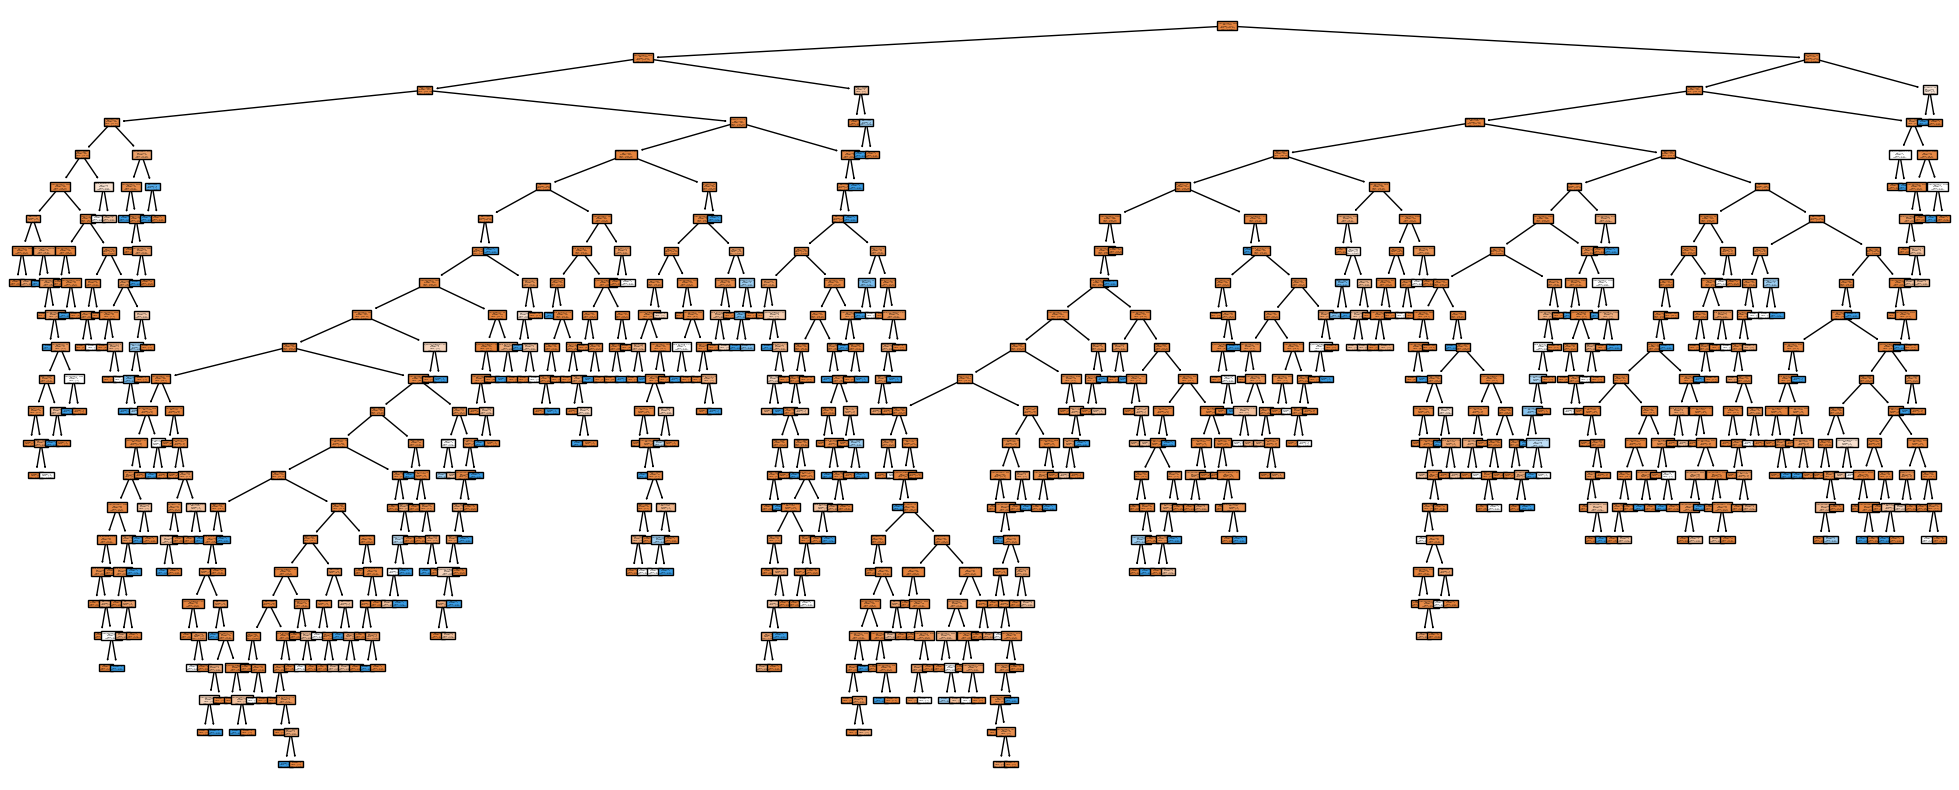

In [216]:
plt.figure(figsize=(25,10))
plot_tree(clf,
         filled=True,
         class_names=['Aprovados', 'Recusados'],
         feature_names=list(X_train.columns));

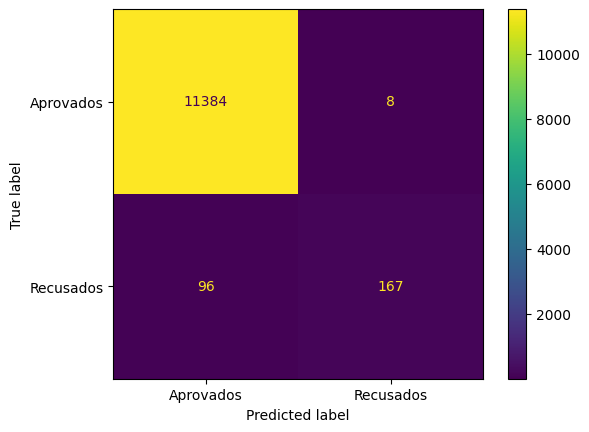

In [217]:
predicao_train = clf.predict(X_train)
cm = confusion_matrix(y_train, predicao_train, labels=clf.classes_)
MatrixDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Recusados'])
                                                                               
MatrixDeConfusao.plot()

In [218]:
accuracy_score(y_train, predicao_train)

0.991076791076791

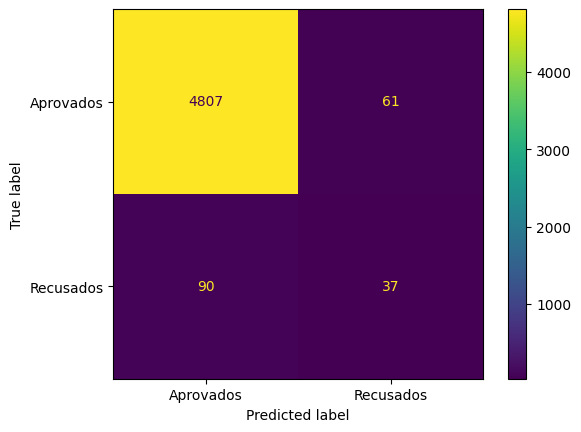

In [223]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrixDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Recusados'])

MatrixDeConfusao.plot()

In [246]:
accuracy_score(y_test, clf.predict(X_test))

0.9697697697697698

In [227]:
clf_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [228]:
clf_podada = clf_podada.fit(X_train, y_train)

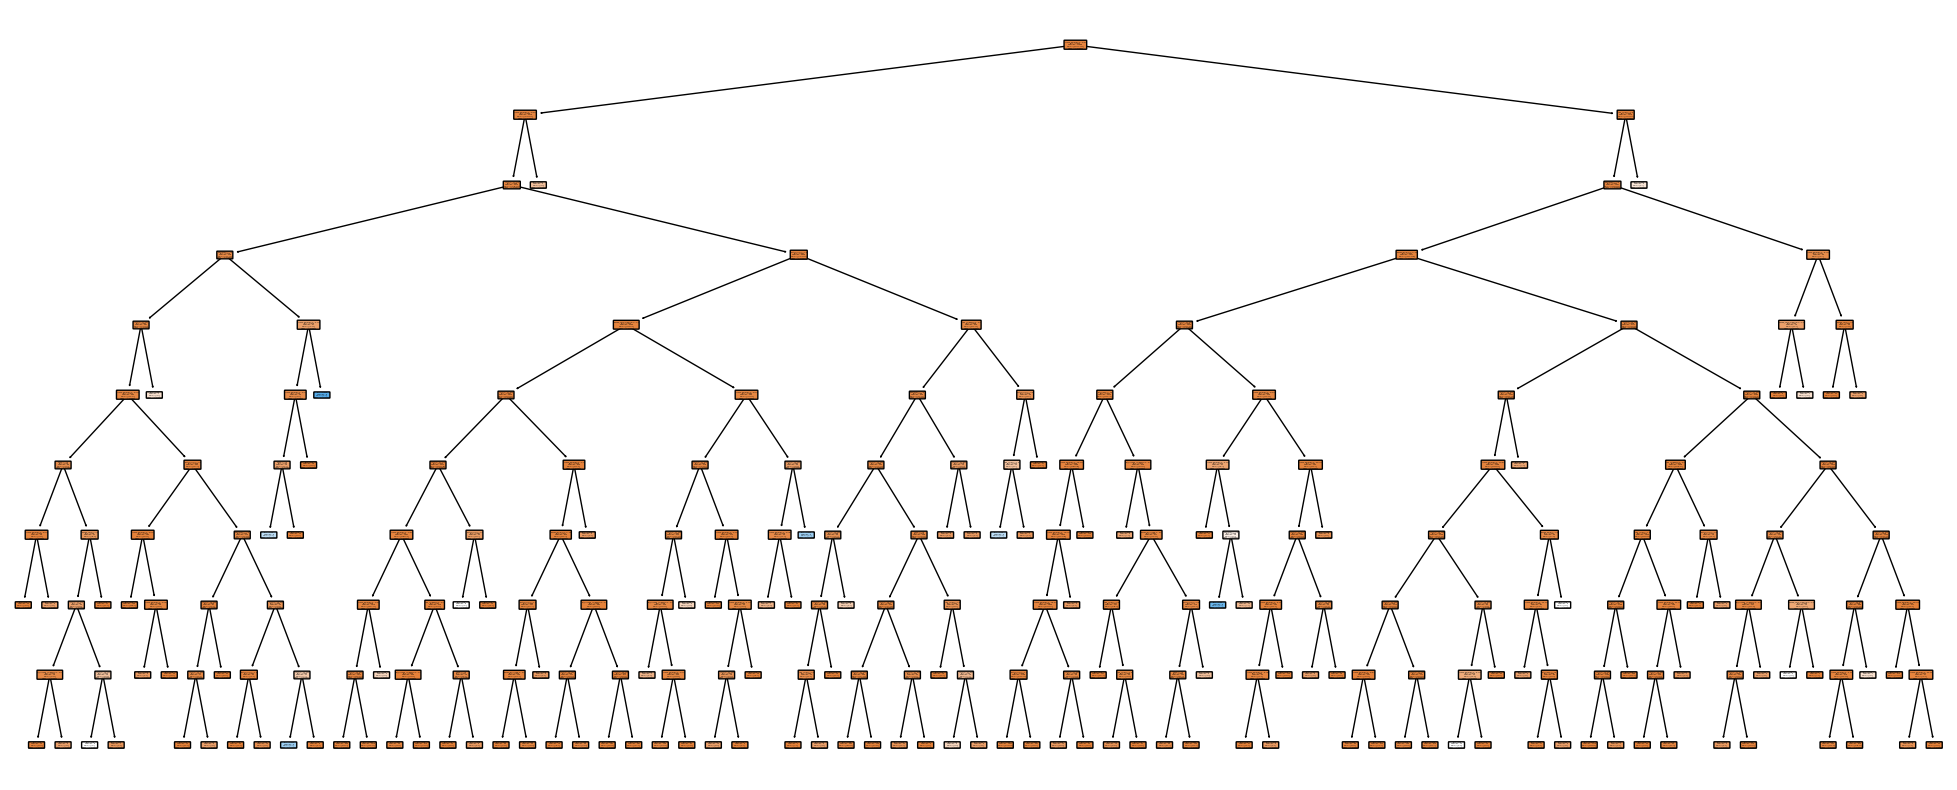

In [232]:
plt.figure(figsize=(25,10))
plot_tree(clf_podada,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Recusados'],
         feature_names=list(X_train.columns));

In [234]:
predict = clf_podada.predict(X_train)

In [237]:
classification_report(y_train, predict)

'              precision    recall  f1-score   support\n\n       False       0.98      1.00      0.99     11392\n        True       0.71      0.10      0.17       263\n\n    accuracy                           0.98     11655\n   macro avg       0.85      0.55      0.58     11655\nweighted avg       0.97      0.98      0.97     11655\n'

In [238]:
maus = sum(predict)

In [239]:
maus

35

In [240]:
credito['mau'] = 0

In [241]:
X_sem_mau = credito.drop(columns=['mau'])

In [242]:
y_com_mau = credito['mau']

In [243]:
arvore_boa = DecisionTreeClassifier(random_state=100)

In [247]:
arvore_boa = arvore_boa.fit(X_sem_mau, y_com_mau)

[Text(0.5, 0.5, 'gini = 0.0\nsamples = 16650\nvalue = 16650.0')]

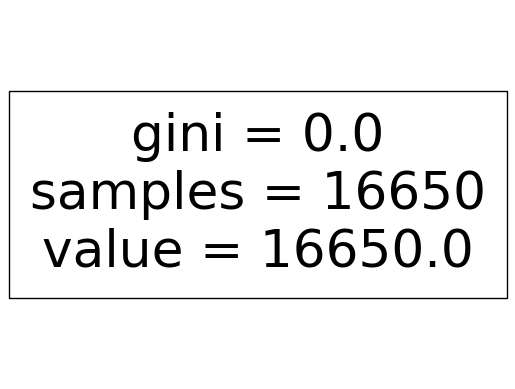

In [245]:
plot_tree(arvore_boa,
         filled=True,
         class_names=['Aprovados','Recusados'],
         feature_names=list(X_sem_mau.columns))